### 1. Time Analysis
#### Is there a specific time when vehicles are most likely to be stopped?

Import libraries and load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\11_Vehicle_stop_NYPD\NYPD_Vehicle_Stop_Reports.csv')

sns.set_style('ticks')
# change data type 
df['date']=pd.to_datetime(df['OCCUR_DT'])
df['hour']=pd.to_datetime(df['OCCUR_TM'], format='%H:%M:%S').dt.hour

- **Monthly Stop Trend:**
	Extracted YYYY-MM-DD from `OCCUR_DT` column and created a new column as `date`. 
	Applied `value_counts` function on the `date` column, and `rolling` function of 30 day average.
	Displayed the total stop count as a line chart.

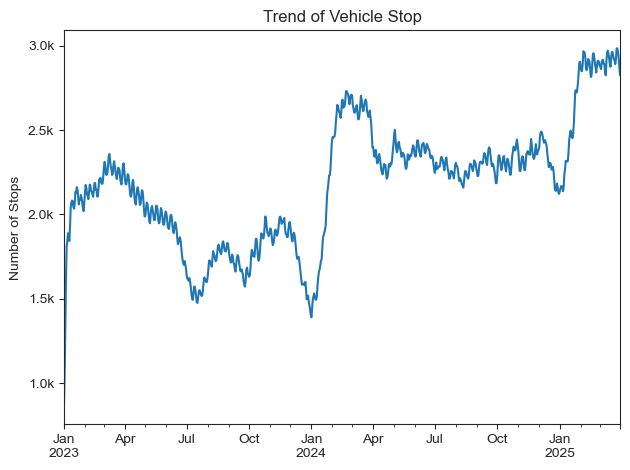

In [19]:
df['date'].value_counts().sort_index().rolling(window=30, min_periods=1).mean().plot()

plt.title('Trend of Vehicle Stop')
plt.ylabel('Number of Stops')
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.1f}k'))

plt.tight_layout()
plt.show()

**Insight**
Compare to 2023, the number of vehicles stopped in 2025 has increased by 1.5 times.

- **Hourly Stop Distribution:**
	Extracted `hour` from `OCCUR_TM`, utilized `displot` to display the result as an hourly distribution.


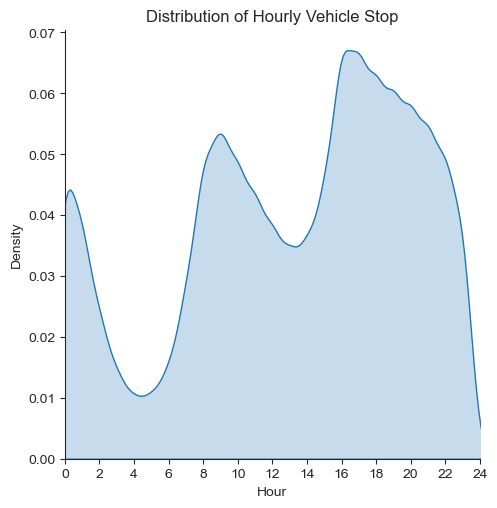

In [43]:
sns.displot(df['hour'],kind='kde', fill=True, bw_adjust=1.5)

plt.title('Distribution of Hourly Vehicle Stop')
plt.xlim(0,24)
plt.xlabel('Hour')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))


**Insight**
The highest number of vehicle stops occur during the evenings (5-8 pm),followed by the morning (8-10 am). The lowest stop counts occur around 4am.